# Random Forests & Extremely Random Forests

A __Random Forest__ is a particular instance of ensemble learning where individual models are constructed using Decision Trees. This ensemble of Decision Trees is then used to predict the output value.

__Extremely Random Forests__ take randomness to the next level. Along with taking a random subset of features, the thresholds are chosen at random too. These randomly generated thresholds are chosen as the splitting rules, which reduce the variance of the model even further.

In [5]:
import argparse
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report
import numpy as np

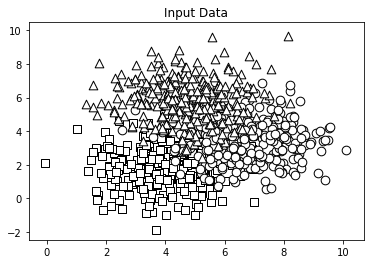

Classifier performance on training dataset
             precision    recall  f1-score   support

    Class-0       1.00      1.00      1.00       221
    Class-1       1.00      1.00      1.00       230
    Class-2       1.00      1.00      1.00       224

avg / total       1.00      1.00      1.00       675

Classifier performance on test dataset
             precision    recall  f1-score   support

    Class-0       1.00      1.00      1.00        79
    Class-1       1.00      1.00      1.00        70
    Class-2       1.00      1.00      1.00        76

avg / total       1.00      1.00      1.00       225

[[ 6.42  5.21  0.  ]
 [ 3.5   5.53  0.  ]
 [ 5.49  4.44  0.  ]
 ..., 
 [ 5.73  5.96  0.  ]
 [ 6.28  6.19  0.  ]
 [ 4.78  4.78  2.  ]]
Confidence Measure


ValueError: Number of features of the model must match the input. Model n_features is 3 and input n_features is 2 

In [26]:
# Argument parser
# def build_arg_parser():
#     parser = argparse.ArgumentParser(description='Classify data using Ensemble Learning Techniques')
#     parser.add_argument('--classifier-type', 
#                         dest='classifier_type', 
#                         required=True, 
#                         choices=['rf', 'erf'], 
#                         help='Type of classifier to use; can be either rf or erf')
#     return parser

if __name__ == '__main__':
    # Parse the input arguments
#     args = build_arg_parser().parse_args()
    classifier_type = 'erf'# args.classifier_type
    
    # Load input data
    input_file = 'data_random_forests.txt'
    data = np.loadtxt(input_file, delimiter=',')
    X, y = data[: :-1], data[:, -1]
    
    # Separate input data into three classes based on labels
    class_0 = np.array(X[y==0])
    class_1 = np.array(X[y==1])
    class_2 = np.array(X[y==2])
    
    # Visualize input data
    plt.figure()
    plt.scatter(class_0[:, 0], 
                class_0[:, 1], 
                s=75, 
                facecolors='white', 
                edgecolors='black', 
                linewidth=1, 
                marker='s')
    plt.scatter(class_1[:, 0], 
                class_1[:, 1], 
                s=75, 
                facecolors='white', 
                edgecolors='black', 
                linewidth=1, 
                marker='o')
    plt.scatter(class_2[:, 0], 
                class_2[:, 1], 
                s=75, 
                facecolors='white', 
                edgecolors='black', 
                linewidth=1, 
                marker='^')
    plt.title('Input Data')
    plt.show()
    
    # Split the data input training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)
    
    # Ensemble learning classifier
    params = {'n_estimators': 100, 'max_depth': 4, 'random_state': 0}
    if classifier_type == 'rf':
        classifier = RandomForestClassifier(**params)
    else:
        classifier = ExtraTreesClassifier(**params)
    
    classifier.fit(X_train, y_train)
    y_test_pred = classifier.predict(X_test)
    
    # Evaluate classifier performance
    class_names = ['Class-0', 'Class-1', 'Class-2']
    print('Classifier performance on training dataset')
    print(classification_report(y_train, classifier.predict(X_train), target_names=class_names))
    
    print('Classifier performance on test dataset')
    print(classification_report(y_test, y_test_pred, target_names=class_names))
    
    # Compute confidence
    test_datapoints = np.array([[5, 5], [3, 6], [6, 4], [7, 2], [4, 4], [5, 2]])
    
#     print('Confidence Measure')
#     for datapoint in test_datapoints:
#         probabilities = classifier.predict_proba([datapoint])[0]
#         print('prob;', probabilities)
#         predicted_classes = 'Class-' + str(np.argmax(probabilities))
#         print('Datapoint: {}'.format(datapoint))
#         print('Predicted Class: {}'.format(predicted_classes))